### Problem Statement

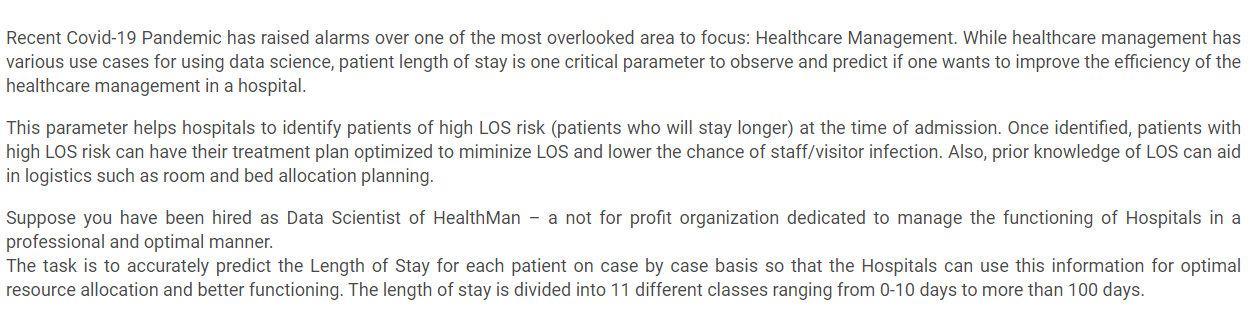

### Data Description

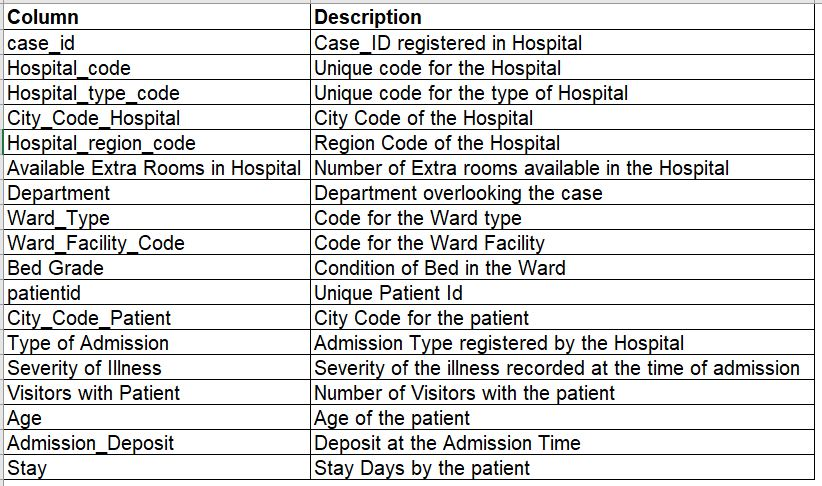

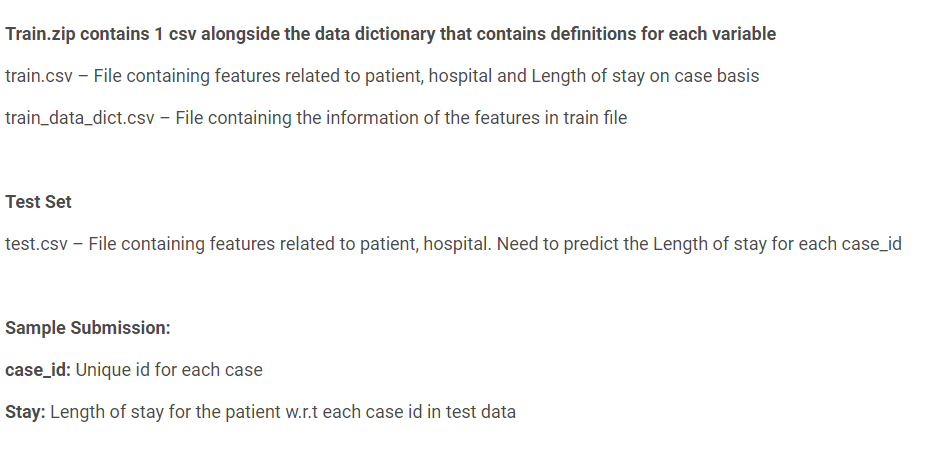

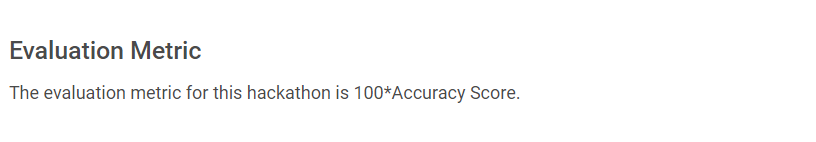

### 1. Libraries

In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

### 2. Read Data

In [ ]:
train_df = pd.read_csv('/kaggle/input/janatahack-healthcare-analytics-ii/Train_hMYJ020/train.csv')
test_df = pd.read_csv('/kaggle/input/janatahack-healthcare-analytics-ii/Test_ND2Q3bm/test.csv')
sub_df = pd.read_csv('/kaggle/input/janatahack-healthcare-analytics-ii/sample_submission_lfbv3c3.csv')


#Training data
print('Training data shape: ', train_df.shape)
train_df.head(5)

In [ ]:
#Test data
print('Test data shape: ', test_df.shape)
test_df.head(5)

### 3. Data Exploration

#### Missing Values

In [ ]:
# Null values and Data types
print('Train Set')
print(train_df.info())
print('-------------')
print('Test Set')
print(test_df.info())

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

Bed Grade and City_Code_Patient have missing entries in both train and test set

#### Total Number of Patients

In [ ]:
# Total number of Patients in the dataset(train+test)
print("Total Patients in Train set: ",train_df['patientid'].nunique())
print("Total Patients in Test set: ",test_df['patientid'].nunique())

In [ ]:
train_df.columns

In [ ]:
#find overlap between train and test sets
cols =  [
            'case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'
          ]
for col in cols:
  print('Total unique '+col  +' values in Train are {}'.format(train_df[col].nunique()))
  print('Total unique '+col  +' values in Test are {}'.format(test_df[col].nunique()))
  print('Common'+col +' values are {}'.format(len(list(set(train_df[col]) & set(test_df[col])))))
  print('**************************')

#### Unique values Count

In [ ]:
for col in train_df.columns:
    print('The unique values of '+col+' column in train_df dataset are {} '.format(train_df[col].nunique()))

In [ ]:
for col in test_df.columns:
    print('The unique values of '+col+' column in test dataset are {}'.format(test_df[col].nunique()))

#### Target variable distribution

In [ ]:
train_df['Stay'].value_counts().iplot(kind='bar',yTitle='Count',color='red')

In [ ]:
trace0 = go.Box(y=train_df["Age"],name="Age")

data = [trace0]
iplot(data)

In [ ]:
trace0 = go.Box(y=train_df["Admission_Deposit"],name="Admission_Deposit")

data = [trace0]
iplot(data)

In [ ]:
train_df['Admission_Deposit'].iplot(kind='hist',bins=30,color='orange',xTitle='Admission_Deposit distribution',yTitle='Count')

In [ ]:
labels = train_df['Hospital_type_code'].value_counts().index
values = train_df['Hospital_type_code'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial')])
fig.show()

In [ ]:
train_df['Hospital_code'].value_counts().iplot(kind='bar',yTitle='Count',color='green')

In [ ]:
City_Code_Hospital = train_df['City_Code_Hospital'].value_counts().sort_values(ascending=False)
City_Code_Hospital.iplot(kind='barh', title='City_Code_Hospital')

In [ ]:
Department = train_df['Department'].value_counts().sort_values(ascending=False)[:10]
Department.iplot(kind='bar', title='Department', color = 'blue')

In [ ]:
labels = train_df['Ward_Type'].value_counts().index
values = train_df['Ward_Type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial')])
fig.show()

In [ ]:
labels = train_df['Ward_Facility_Code'].value_counts().index
values = train_df['Ward_Facility_Code'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial')])
fig.show()

In [ ]:
train_df['Severity of Illness'].value_counts(normalize=True)

In [ ]:
train_df['Severity of Illness'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='green',
                                                      theme='pearl',
                                                      bargap=0.8,
                                                      gridcolor='white',
                                                     
                                                      title='Distribution of the Severity of Illness column in the training set')


In [ ]:
train_df['Hospital_region_code'].value_counts(normalize=True)

In [ ]:
train_df['Hospital_region_code'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='pink',
                                                      theme='pearl',
                                                      bargap=0.8,
                                                      gridcolor='white',
                                                     
                                                      title='Distribution of the Hospital_region_code column in the training set')


In [ ]:
labels = train_df['Bed Grade'].value_counts().index
values = train_df['Bed Grade'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial')])
fig.show()

#### Basic statistics of variables

In [ ]:
train_df.columns

In [ ]:
train_df[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']].describe(include='all')

#### Memory Optimization

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [ ]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

### Observations


1. There are no common patients observed in both train and test data
2. Bed Grade and City_Code_Patient have missing entries in both train and test set
3. Majority of the patient cases had 21-30 days as Stat time in hospital
4. Median age of patients is 41-50 group
5. Median admission deposit is ~5000
6. Hospital_type_code distribution is majorly with a, b
7. Majority of cases are found at Hospital_code-26 
8. City_Code_Hospital - 0 has majority of cases 
9. Gynecalogy department has majority of patient admissions
10. Ward_type 'R' and 'Q' has majority of cases
11. Ward_Facility_Code 'E' and 'F' have majority of cases
12. Moderate patients are captured majroly in this data
13. Hospital_region_code - 'X' and 'Y' majorly contributed 
14. Bed Grade - 2 and 3 have more cases
15. data set size is optimized
16. Target variable is highly imbalanced

## TO BE CONTINUED ...

#### the kernel is still in progress